

# Quick Visualization for Hyperparameter Optimization Analysis

Optuna provides various visualization features in :mod:`optuna.visualization` to analyze optimization results visually.

Note that this tutorial requires [Plotly](https://plotly.com/python)_ to be installed:

```console
$ pip install plotly

# Required if you are running this tutorial in Jupyter Notebook.
$ pip install nbformat
```
If you prefer to use [Matplotlib](https://matplotlib.org/)_ instead of Plotly, please run the following command:

```console
$ pip install matplotlib
```
This tutorial walks you through this module by visualizing the optimization results of PyTorch model for FashionMNIST dataset.

For visualizing multi-objective optimization (i.e., the usage of :func:`optuna.visualization.plot_pareto_front`),
please refer to the tutorial of `multi_objective`.

<div class="alert alert-info"><h4>Note</h4><p>By using [Optuna Dashboard](https://github.com/optuna/optuna-dashboard)_, you can also check the optimization history,
   hyperparameter importances, hyperparameter relationships, etc. in graphs and tables.
   Please make your study persistent using `RDB backend <rdb>` and execute following commands to run Optuna Dashboard.

```console
$ pip install optuna-dashboard
$ optuna-dashboard sqlite:///example-study.db
```
   Please check out [the GitHub repository](https://github.com/optuna/optuna-dashboard)_ for more details.

   .. list-table::
      :header-rows: 1

      * - Manage Studies
        - Visualize with Interactive Graphs
      * - .. image:: https://user-images.githubusercontent.com/5564044/205545958-305f2354-c7cd-4687-be2f-9e46e7401838.gif
        - .. image:: https://user-images.githubusercontent.com/5564044/205545965-278cd7f4-da7d-4e2e-ac31-6d81b106cada.gif</p></div>


In [1]:
#!pip install plotly
#!pip install nbformat


In [2]:
import optuna
from optuna.storages import JournalStorage
from optuna.storages.journal import JournalFileBackend

storage = JournalStorage(JournalFileBackend("./journal.log"))
study_summaries = optuna.get_all_study_summaries(storage=storage)

for summary in study_summaries:
    #print(summary.study_name, summary.n_trials, summary.best_trial.value)
    print(summary.study_name, summary.n_trials)
    #if summary.study_name != "cifar10_resnet":
    #    optuna.delete_study(storage=storage, study_name=summary.study_name)
    

cifar10_resnet 162
cifar10_resnet_gaussian 480
cifar10_resnet_augment 838
cifar10_resnet_discrete 631
cifar10_resnet_disc_aug 387
cifar100_resnet_discrete 757
cifar100_resnet_disc_aug 1166
cifar10_wideresnet_augcut100 47


In [3]:
#study = optuna.load_study(storage=storage, study_name="cifar10_resnet")
#study = optuna.load_study(storage=storage, study_name="cifar10_resnet_gaussian")
study = optuna.load_study(storage=storage, study_name="cifar10_resnet_augment")
study.best_trial.value


0.8794

In [4]:
print("Best trial:")
best_trial = study.best_trial
print(f"Value: {best_trial.value}")
print("Params:")
for key, value in best_trial.params.items():
    print(f"  {key}: {value}")
    

Best trial:
Value: 0.8794
Params:
  lr: 0.006152722528214149
  momentum: 0.8
  weight_decay: 0.005495547223030897
  T_max: 50


## Plot functions
Visualize the optimization history. See :func:`~optuna.visualization.plot_optimization_history` for the details.



In [2]:
# You can use Matplotlib instead of Plotly for visualization by simply replacing `optuna.visualization` with
# `optuna.visualization.matplotlib` in the following examples.
from optuna.visualization import plot_contour
from optuna.visualization import plot_edf
from optuna.visualization import plot_intermediate_values
from optuna.visualization import plot_optimization_history
from optuna.visualization import plot_parallel_coordinate
from optuna.visualization import plot_param_importances
from optuna.visualization import plot_rank
from optuna.visualization import plot_slice
from optuna.visualization import plot_timeline


ModuleNotFoundError: No module named 'optuna'

In [6]:
#!pip install plotly
#!pip install jupyterlab
#!pip install jupyterlab-plotly
#!pip install ipywidgets

In [7]:
import plotly.io as pio
pio.renderers.default = 'iframe_connected'  # or 'notebook_connected'


In [1]:
fig = plot_optimization_history(study)
fig.show()


NameError: name 'plot_optimization_history' is not defined

Visualize the learning curves of the trials. See :func:`~optuna.visualization.plot_intermediate_values` for the details.



In [9]:
plot_intermediate_values(study).show()

Visualize high-dimensional parameter relationships. See :func:`~optuna.visualization.plot_parallel_coordinate` for the details.



In [10]:
plot_parallel_coordinate(study).show()

Select parameters to visualize.



In [11]:
try:
    plot_parallel_coordinate(study, params=["lr", "n_layers"]).show()

except Exception as e:
    print(f"Visualization failed: {e}")


Visualization failed: Parameter n_layers does not exist in your study.


Visualize hyperparameter relationships. See :func:`~optuna.visualization.plot_contour` for the details.



In [12]:
plot_contour(study).show()

Select parameters to visualize.



In [13]:
try:
    plot_contour(study, params=["lr", "n_layers"]).show()
    
except Exception as e:
    print(f"Visualization failed: {e}")


Visualization failed: Parameter n_layers does not exist in your study.


Visualize individual hyperparameters as slice plot. See :func:`~optuna.visualization.plot_slice` for the details.



In [14]:
plot_slice(study).show()

Select parameters to visualize.



In [15]:
try:
    plot_slice(study, params=["lr", "n_layers"]).show()
    
except Exception as e:
    print(f"Visualization failed: {e}")


Visualization failed: Parameter n_layers does not exist in your study.


Visualize parameter importances. See :func:`~optuna.visualization.plot_param_importances` for the details.



In [16]:
plot_param_importances(study).show()

Learn which hyperparameters are affecting the trial duration with hyperparameter importance.



Visualize empirical distribution function. See :func:`~optuna.visualization.plot_edf` for the details.



In [18]:
plot_edf(study).show()

Visualize parameter relations with scatter plots colored by objective values. See :func:`~optuna.visualization.plot_rank` for the details.



In [19]:
plot_rank(study).show()

Visualize the optimization timeline of performed trials. See :func:`~optuna.visualization.plot_timeline` for the details.



In [20]:
plot_timeline(study).show()

## Customize generated figures
In :mod:`optuna.visualization` and :mod:`optuna.visualization.matplotlib`, a function returns an editable figure object:
:class:`plotly.graph_objects.Figure` or :class:`matplotlib.axes.Axes` depending on the module.
This allows users to modify the generated figure for their demand by using API of the visualization library.
The following example replaces figure titles drawn by Plotly-based :func:`~optuna.visualization.plot_intermediate_values` manually.



In [21]:
fig = plot_intermediate_values(study)

fig.update_layout(
    title="Hyperparameter optimization for classification",
    xaxis_title="Epoch",
    yaxis_title="Validation Accuracy",
).show()

In [22]:
study.trials_dataframe().head()

,number,value,datetime_start,datetime_complete,duration,params_T_max,params_lr,params_momentum,params_weight_decay,state
0,0,0.8001,2025-10-11 18:51:11.082130,2025-10-11 19:13:35.644640,0 days 00:22:24.562510,23,0.057608,0.829197,0.000071,COMPLETE
1,1,0.6976,2025-10-11 18:51:11.374593,2025-10-11 19:13:55.400329,0 days 00:22:44.025736,39,0.000104,0.909072,0.002663,COMPLETE
2,2,0.8034,2025-10-11 18:51:11.414210,2025-10-11 19:13:11.694410,0 days 00:22:00.280200,37,0.000250,0.956345,0.035880,COMPLETE
3,3,0.4184,2025-10-11 18:51:11.418012,2025-10-11 19:13:06.065784,0 days 00:21:54.647772,27,0.022194,0.872243,0.008296,COMPLETE
4,4,0.3308,2025-10-11 18:51:11.469728,2025-10-11 19:13:41.839538,0 days 00:22:30.369810,25,0.007029,0.841129,0.072371,COMPLETE


In [23]:

import optuna
import numpy as np
import pandas as pd
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.preprocessing import MinMaxScaler
from optuna.storages import JournalStorage
from optuna.storages.journal import JournalFileBackend

# ----------------------------
# Load Optuna study
# ----------------------------
# storage = JournalStorage(JournalFileBackend("journal.log"))
# study = optuna.load_study(study_name="cifar10_study", storage=storage)

# ----------------------------
# Extract completed trials only
# ----------------------------
df = study.trials_dataframe(attrs=("params", "value", "state"))
df = df[df["state"] == "COMPLETE"].dropna(subset=["value"])

X_raw = df.filter(like="params_")
y = df["value"].values

if X_raw.empty:
    raise ValueError("No completed trials found for GP fitting.")

# ----------------------------
# Apply log10 scaling to selected parameters
# ----------------------------
X_log_scaled = X_raw.copy()
for col in X_log_scaled.columns:
    if col.endswith("lr") or col.endswith("weight_decay"):
        X_log_scaled[col] = np.log10(X_log_scaled[col])

# ----------------------------
# Normalize hyperparameters
# ----------------------------
scaler = MinMaxScaler()
X = scaler.fit_transform(X_log_scaled)

# ----------------------------
# Fit Gaussian Process
# ----------------------------
kernel = C(1.0, (1e-3, 1e3)) * RBF(length_scale=1.0)
gp = GaussianProcessRegressor(kernel=kernel, alpha=1e-6, normalize_y=True)
gp.fit(X, y)

# ----------------------------
# Predict mean and std for each completed trial
# ----------------------------
y_mean, y_std = gp.predict(X, return_std=True)

# ----------------------------
# Create output DataFrame
# ----------------------------
output_df = X_raw.copy()
output_df["gp_mean"] = y_mean
output_df["gp_std"] = y_std
output_df["observed_accuracy"] = y

# Sort by predicted mean accuracy
output_df_sorted = output_df.sort_values(by="gp_mean", ascending=False)

# Show top 5
output_df_sorted.head(5)


/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/kernels.py:440: ConvergenceWarning:

The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.



,params_T_max,params_lr,params_momentum,params_weight_decay,gp_mean,gp_std,observed_accuracy
540,50,0.006153,0.800000,0.005496,0.8794,0.000167,0.8794
541,50,0.006159,0.800000,0.005483,0.8791,0.000167,0.8791
730,50,0.001201,0.940173,0.011913,0.8783,0.000167,0.8783
539,50,0.006148,0.800000,0.005511,0.8781,0.000167,0.8781
535,50,0.006129,0.800000,0.005552,0.8780,0.000167,0.8780


In [24]:
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd

# Step 1: Extract and log-scale relevant hyperparameters
X_raw = df.filter(like="params_").copy()
for col in X_raw.columns:
    if col.endswith("lr") or col.endswith("weight_decay"):
        X_raw[col] = np.log10(X_raw[col])

# Step 2: Normalize
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_raw)

# Step 3: Find k-nearest neighbors
k = 10
nn = NearestNeighbors(n_neighbors=k)
nn.fit(X_scaled)
distances, indices = nn.kneighbors(X_scaled)

# Step 4: Compute local mean and std deviation of accuracy
y = df["value"].values
df["local_avg_accuracy"] = [np.mean(y[neighbors]) for neighbors in indices]
df["local_std_accuracy"] = [np.std(y[neighbors]) for neighbors in indices]

# Step 5: Compute local mean and std for each hyperparameter
for col in X_raw.columns:
    local_means = []
    local_stds = []
    for neighbors in indices:
        neighbor_vals = X_raw.iloc[neighbors][col].values
        local_means.append(np.mean(neighbor_vals))
        local_stds.append(np.std(neighbor_vals))
    df[f"{col}_local_mean"] = local_means
    df[f"{col}_local_std"] = local_stds

df.sort_values(by="local_avg_accuracy", ascending=False)

,params_T_max,params_lr,params_momentum,params_weight_decay,value,state,local_avg_accuracy,local_std_accuracy,params_T_max_local_mean,params_T_max_local_std,params_lr_local_mean,params_lr_local_std,params_momentum_local_mean,params_momentum_local_std,params_weight_decay_local_mean,params_weight_decay_local_std
539,50,0.006148,0.800000,0.005511,0.8781,COMPLETE,0.87583,0.003021,50.0,0.000000,-2.126402,0.129297,0.800253,0.000510,-2.260193,0.039161
538,50,0.006147,0.800000,0.005510,0.8732,COMPLETE,0.87583,0.003021,50.0,0.000000,-2.126402,0.129297,0.800253,0.000510,-2.260193,0.039161
535,50,0.006129,0.800000,0.005552,0.8780,COMPLETE,0.87583,0.003021,50.0,0.000000,-2.126402,0.129297,0.800253,0.000510,-2.260193,0.039161
541,50,0.006159,0.800000,0.005483,0.8791,COMPLETE,0.87583,0.003021,50.0,0.000000,-2.126402,0.129297,0.800253,0.000510,-2.260193,0.039161
526,50,0.006201,0.800000,0.004598,0.8767,COMPLETE,0.87583,0.003021,50.0,0.000000,-2.126402,0.129297,0.800253,0.000510,-2.260193,0.039161
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
411,33,0.100000,0.990000,0.000013,0.1007,COMPLETE,0.18088,0.133571,33.6,0.489898,-1.000000,0.000000,0.990000,0.000000,-4.889626,0.014033
403,33,0.100000,0.990000,0.000013,0.2446,COMPLETE,0.18088,0.133571,33.6,0.489898,-1.000000,0.000000,0.990000,0.000000,-4.889626,0.014033
406,33,0.100000,0.990000,0.000013,0.1002,COMPLETE,0.18088,0.133571,33.6,0.489898,-1.000000,0.000000,0.990000,0.000000,-4.889626,0.014033
133,36,0.010785,0.990000,0.074696,0.1000,COMPLETE,0.15710,0.052495,43.0,3.162278,-1.477231,0.265777,0.987690,0.006931,-1.418220,0.377843


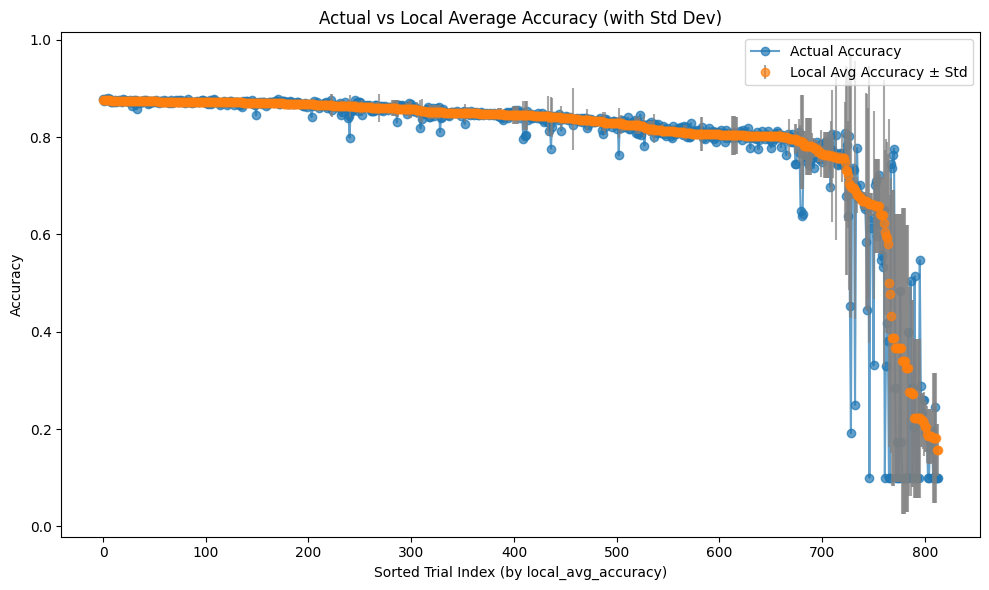

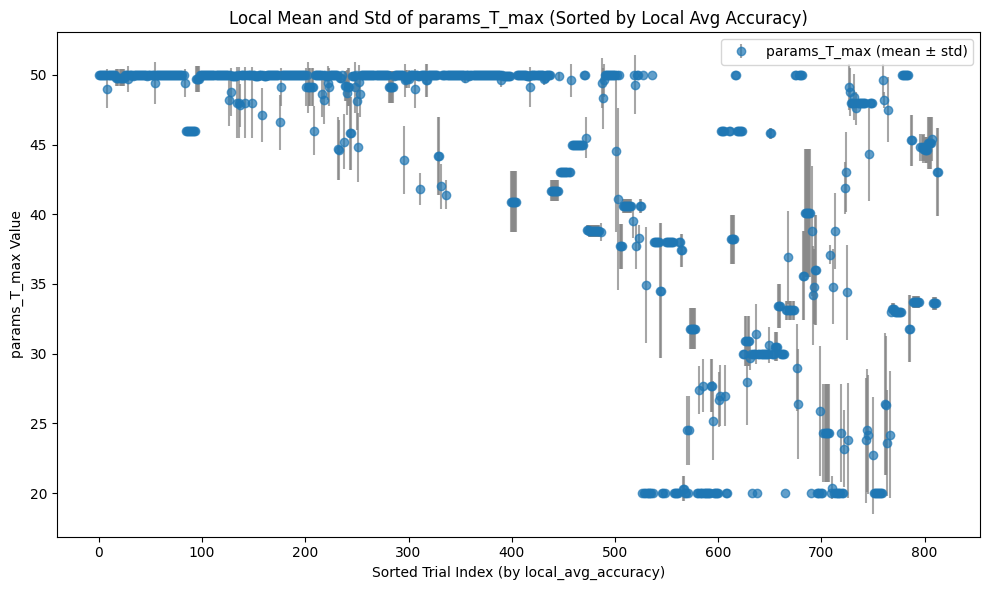

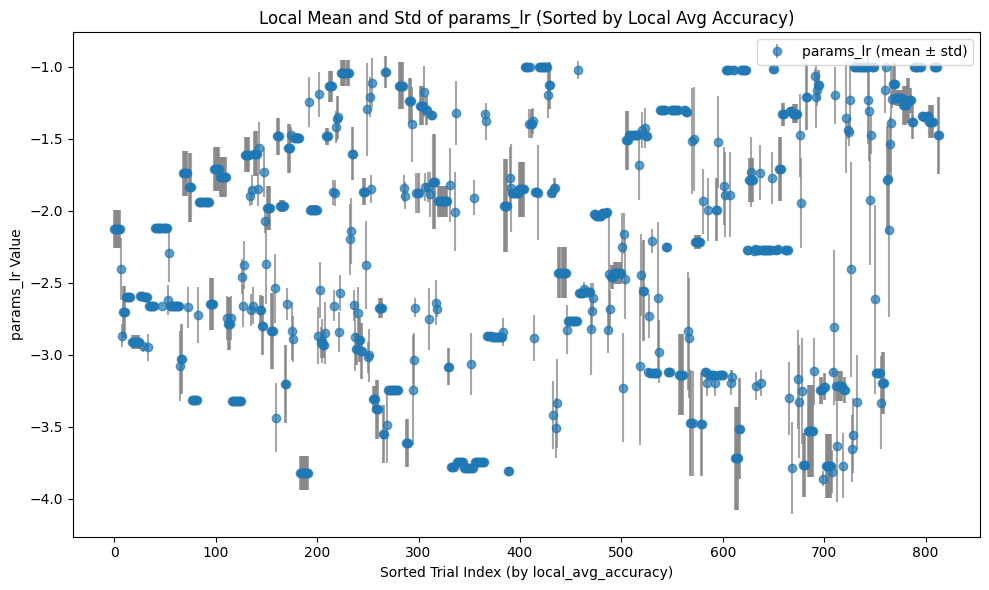

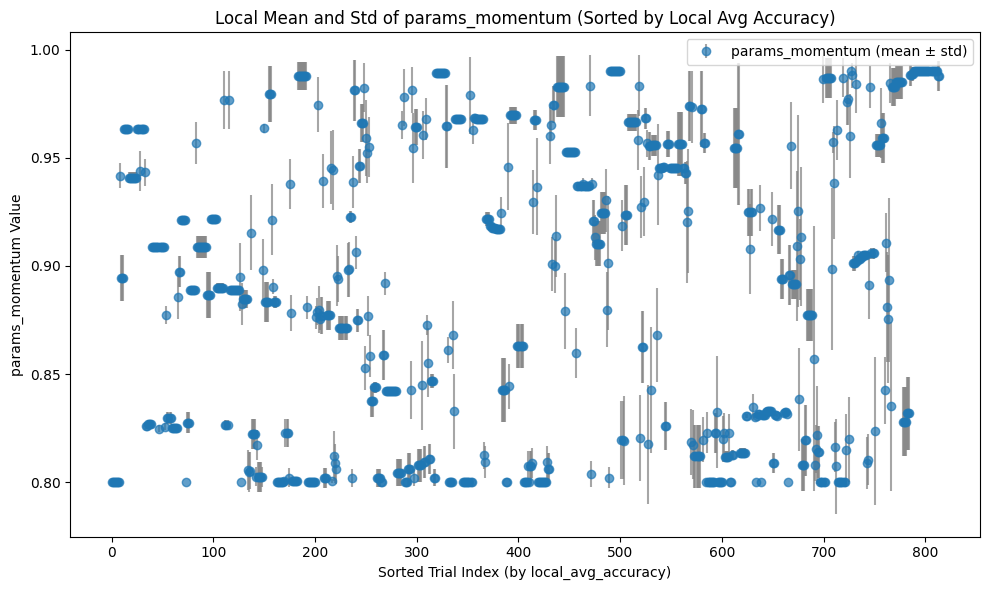

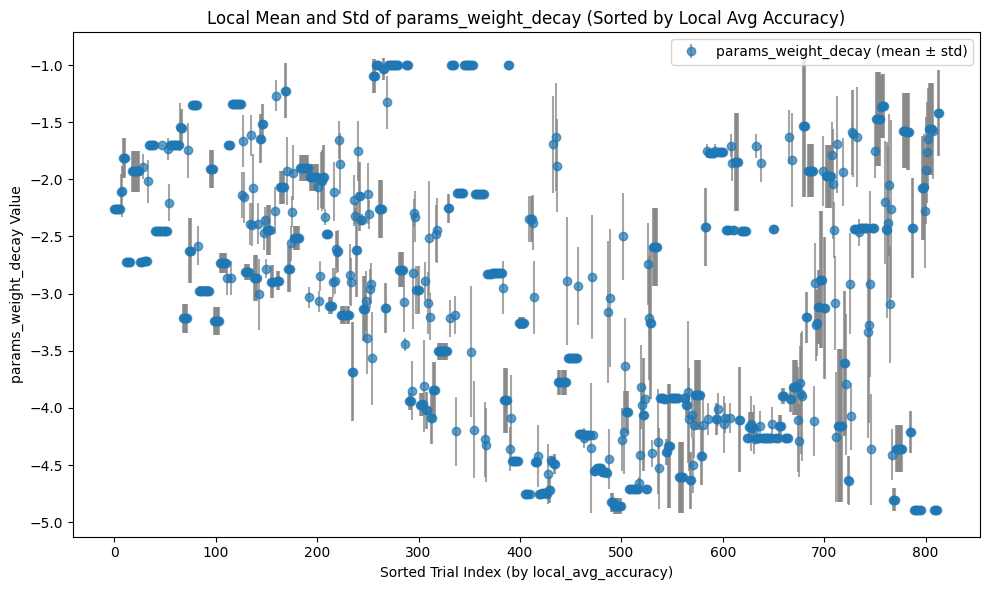

In [25]:
import matplotlib.pyplot as plt

# Sort by local average accuracy
df_sorted = df.sort_values(by="local_avg_accuracy", ascending=False).reset_index(drop=True)

# --- Plot 1: Actual vs Local Average Accuracy ---
plt.figure(figsize=(10, 6))
plt.plot(df_sorted["value"], label="Actual Accuracy", marker='o', linestyle='-', alpha=0.7)
plt.errorbar(
    x=range(len(df_sorted)),
    y=df_sorted["local_avg_accuracy"],
    yerr=df_sorted["local_std_accuracy"],
    fmt='o',
    ecolor='gray',
    alpha=0.7,
    label="Local Avg Accuracy ± Std"
)
plt.xlabel("Sorted Trial Index (by local_avg_accuracy)")
plt.ylabel("Accuracy")
plt.title("Actual vs Local Average Accuracy (with Std Dev)")
plt.legend()
plt.tight_layout()
plt.show()

# --- Plot 2+: Local Mean and Std of Each Hyperparameter ---
param_cols = [col for col in df_sorted.columns if col.startswith("params_") and col.endswith("_local_mean")]
base_params = [col.replace("_local_mean", "") for col in param_cols]

for param in base_params:
    mean_col = f"{param}_local_mean"
    std_col = f"{param}_local_std"

    plt.figure(figsize=(10, 6))
    plt.errorbar(
        x=range(len(df_sorted)),
        y=df_sorted[mean_col],
        yerr=df_sorted[std_col],
        fmt='o',
        ecolor='gray',
        alpha=0.7,
        label=f"{param} (mean ± std)"
    )
    plt.xlabel("Sorted Trial Index (by local_avg_accuracy)")
    plt.ylabel(f"{param} Value")
    plt.title(f"Local Mean and Std of {param} (Sorted by Local Avg Accuracy)")
    plt.legend()
    plt.tight_layout()
    plt.show()